In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

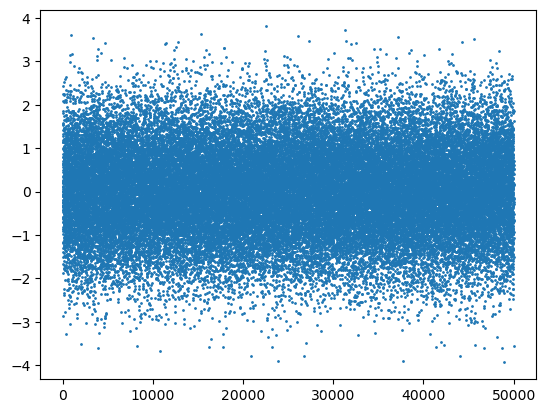

  0%|          | 0/900 [00:00<?, ?it/s]

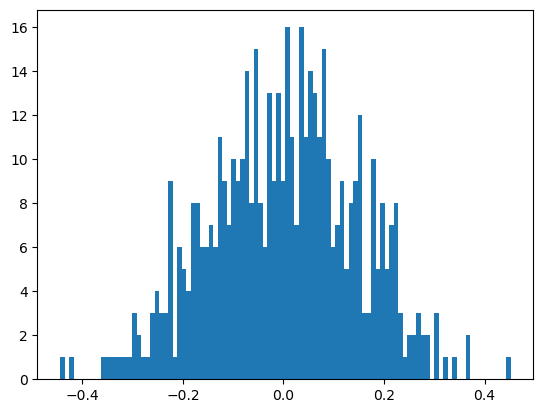

 43%|████▎     | 383/900 [00:01<00:01, 354.02it/s]

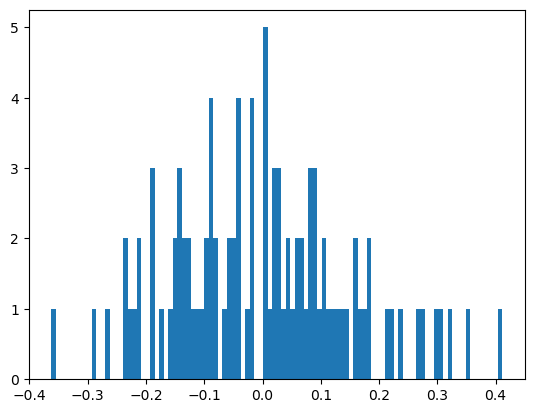

100%|██████████| 900/900 [00:02<00:00, 303.64it/s]


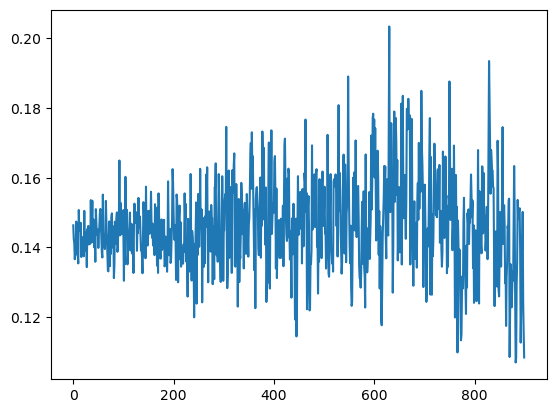

In [12]:
# Model a random white noise process
np.random.seed(5)
n = 50000
t = np.linspace(0., n, n)
x = np.random.randn(n)

plt.scatter(t, x, s = 1)
plt.show()

averaging_window = 100
stds = []
for dist in tqdm(range(100, 1000)):
    x_diffs = []
    for t in range(0, 50000 - dist - averaging_window, dist):
        # Get the average for between the two windows
        #x_avg = 0.5 * (np.mean(x[t:t + averaging_window]) + np.mean(x[t + dist:t + dist + averaging_window]))
        x_diff = np.mean(x[t:t + averaging_window]) - np.mean(x[t + dist:t + dist + averaging_window])
        x_diffs.append(x_diff)

    if dist == 100:
        plt.hist(x_diffs, bins = 100)
        plt.show()
    if dist == 500:
        plt.hist(x_diffs, bins = 100)
        plt.show()
    stds.append(np.std(x_diffs))

plt.plot(stds)

In [26]:
# Gets the noise spectrum by looking at the standard deviation of the change in delta phases over some time period.
def get_noise_spectrum(delta_phases, averaging_window):
    time_windows = range(1, (delta_phases.shape[0] - averaging_window) // 2, 1)
    avg_delta_phases_std = []
    for time_window in tqdm(time_windows):
        avg_delta_phases = []
        for i in np.arange(0, delta_phases.shape[0] - time_window - averaging_window, time_window):
            average_delta_phase_init = np.mean(delta_phases[i:i + averaging_window])
            average_delta_phase_final = np.mean(delta_phases[i + time_window:i + time_window + averaging_window])

            est_avg_delta_phases = average_delta_phase_init - average_delta_phase_final
            avg_delta_phases.append(est_avg_delta_phases)

        avg_delta_phases_std.append(np.std(avg_delta_phases))

    return time_windows, avg_delta_phases_std

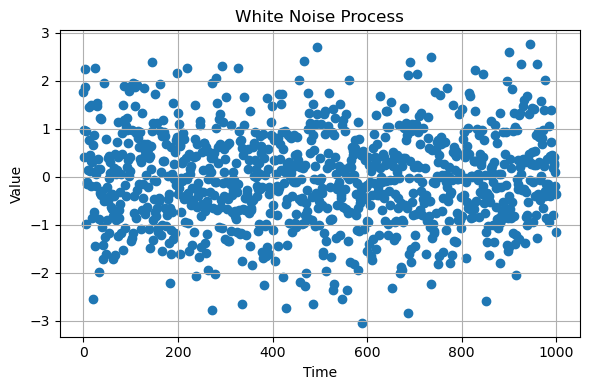

100%|██████████| 449/449 [00:00<00:00, 4655.61it/s]


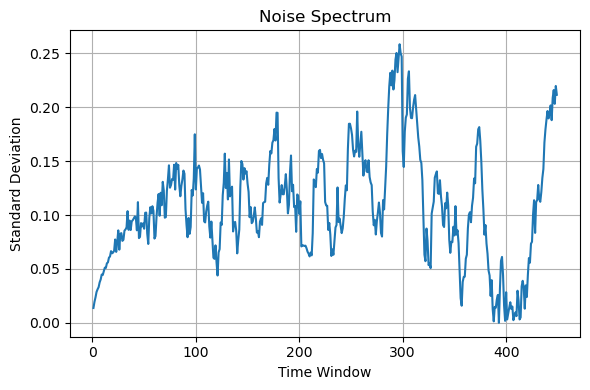

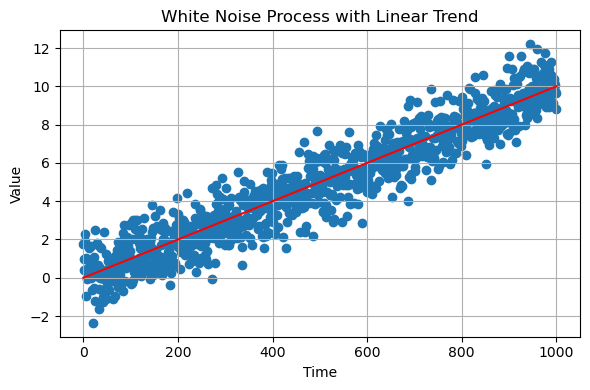

100%|██████████| 449/449 [00:00<00:00, 5117.51it/s]


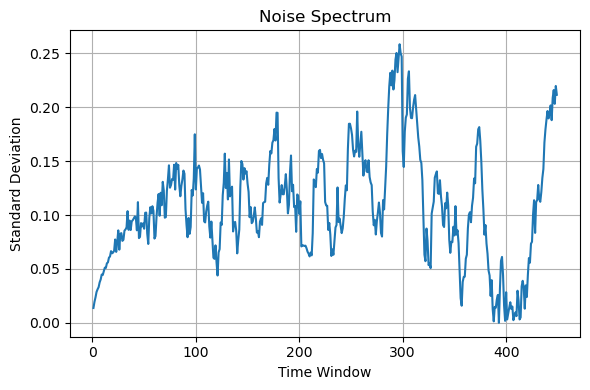

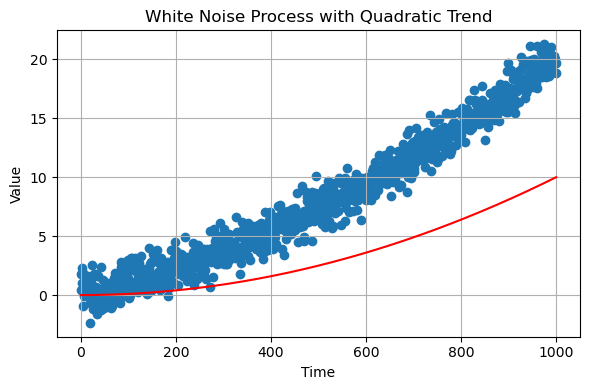

100%|██████████| 449/449 [00:00<00:00, 4997.62it/s]


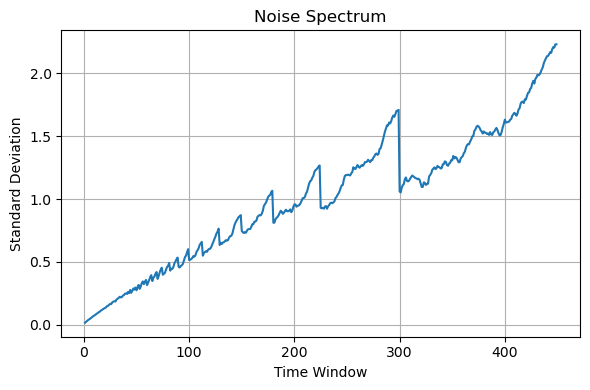

In [27]:
# Model a random white noise process
np.random.seed(0)
n = 1000
t = np.linspace(0., n, n)
x = np.random.randn(n)

# Plot the time series
plt.figure(figsize=(6, 4))
plt.scatter(t, x)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('White Noise Process')
plt.grid(True)
plt.tight_layout()
plt.show()

# Get noise spectrum
time_windows, avg_delta_phases_std = get_noise_spectrum(x, 100)

# Plot noise spectrum
plt.figure(figsize=(6, 4))
plt.plot(time_windows, avg_delta_phases_std)
plt.xlabel('Time Window')
plt.ylabel('Standard Deviation')
plt.title('Noise Spectrum')
plt.grid(True)
plt.tight_layout()
plt.show()

# Model a random white noise process with a linear trend
trend = 0.01 * t
x = x + trend

# Plot the time series
plt.figure(figsize=(6, 4))
plt.scatter(t, x)
plt.plot(t, trend, color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('White Noise Process with Linear Trend')
plt.grid(True)
plt.tight_layout()
plt.show()

# Get noise spectrum
time_windows, avg_delta_phases_std = get_noise_spectrum(x, 100)

# Plot noise spectrum
plt.figure(figsize=(6, 4))
plt.plot(time_windows, avg_delta_phases_std)
plt.xlabel('Time Window')
plt.ylabel('Standard Deviation')
plt.title('Noise Spectrum')
plt.grid(True)
plt.tight_layout()
plt.show()

# Model a random white noise process with a quadratic trend
trend = 0.00001 * t**2
x = x + trend

# Plot the time series
plt.figure(figsize=(6, 4))
plt.scatter(t, x)
plt.plot(t, trend, color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('White Noise Process with Quadratic Trend')
plt.grid(True)
plt.tight_layout()
plt.show()

# Get noise spectrum
time_windows, avg_delta_phases_std = get_noise_spectrum(x, 100)

# Plot noise spectrum
plt.figure(figsize=(6, 4))
plt.plot(time_windows, avg_delta_phases_std)
plt.xlabel('Time Window')
plt.ylabel('Standard Deviation')
plt.title('Noise Spectrum')
plt.grid(True)
plt.tight_layout()
plt.show()
